<a href="https://colab.research.google.com/github/Akhilaaj/Akhilaaj/blob/main/3rd_June_Fashion_MNIST_(Post_Modelling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
# Fashion MNIST - https://github.com/zalandoresearch/fashion-mnist
"""
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
label_encoder = {0:"T-shirt/top",
                 1:	"Trouser",
                 2:	"Pullover",
                 3:	"Dress",
                 4:	"Coat",
                 5:	"Sandal",
                 6:	"Shirt",
                 7:	"Sneaker",
                 8:	"Bag",
                 9:	"Ankle boot"
                }

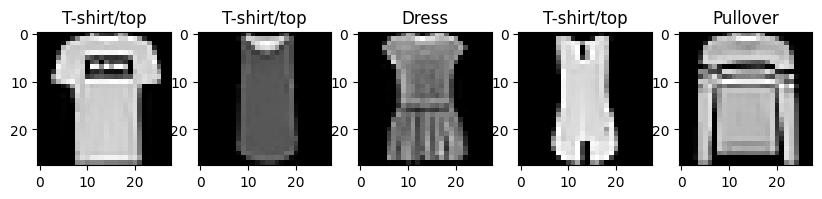

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(1, 6):
  plt.subplot(1,5,i)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(label_encoder[y_train[i]])

In [ ]:
# Question - Plot 6 images for each category (and images should be random everytime)
#          - Perform EDA 

In [ ]:
# Pre Processing 
# Input 
x_train = x_train / 255.0

# Output 
y_train = pd.get_dummies(y_train)

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [ ]:
# Model 
model = tf.keras.models.Sequential()
# First Layer (Input)
model.add(tf.keras.layers.Input((28, 28), name="InputLayer"))
# Flatten 
model.add(tf.keras.layers.Flatten(name="Flatten"))
# Hidden Layer 
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu, name="HiddenLayer"))
# 2nd Hidden Layer
model.add(tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, name="HiddenLayer2"))
# Otutput Layer
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, name="Output"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 HiddenLayer (Dense)         (None, 128)               100480    
                                                                 
 HiddenLayer2 (Dense)        (None, 16)                2064      
                                                                 
 Output (Dense)              (None, 10)                170       
                                                                 
Total params: 102,714
Trainable params: 102,714
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(784*128 + 128)
print(128*16 + 16)
print(16*10 + 10)

100480
2064
170


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics = ["acc"])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 4s 4ms/step - loss: 1.0043 - acc: 0.6600 - val_loss: 0.6811 - val_acc: 0.7703
Epoch 2/10
844/844 [==============================] - 4s 5ms/step - loss: 0.6117 - acc: 0.7922 - val_loss: 0.5529 - val_acc: 0.8117
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.5309 - acc: 0.8170 - val_loss: 0.5076 - val_acc: 0.8282
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4935 - acc: 0.8281 - val_loss: 0.4836 - val_acc: 0.8287
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4704 - acc: 0.8372 - val_loss: 0.4649 - val_acc: 0.8385
Epoch 6/10
844/844 [==============================] - 4s 5ms/step - loss: 0.4525 - acc: 0.8422 - val_loss: 0.4450 - val_acc: 0.8433
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4382 - acc: 0.8477 - val_loss: 0.4451 - val_acc: 0.8438
Epoch 8/10
844/844 [==============================] - 3s 4ms/step - loss: 0.

In [ ]:
# Saving the model
model.save("fashion_mnist_model")

In [ ]:
model.get_weights()

In [ ]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "InputLayer"}}, {"class_name": "Flatten", "config": {"name": "Flatten", "trainable": true, "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "HiddenLayer", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "HiddenLayer2", "trainable": true, "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config"

In [ ]:
# Predictions 
model.predict()

In [ ]:
model.input_shape

(None, 28, 28)

Text(0.5, 1.0, 'Ankle boot')

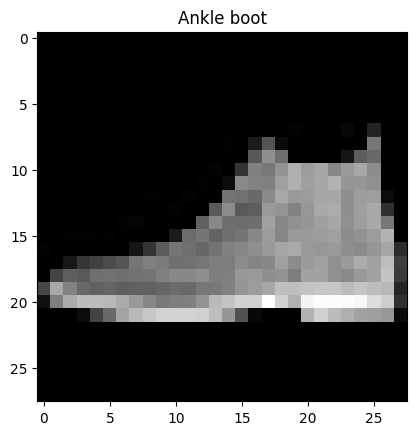

In [ ]:
test_image = x_test[0]
plt.imshow(test_image, cmap="gray")
plt.title(label_encoder[y_test[0]])

In [ ]:
# Read image 
test_image = x_test[0]
# Normalize the image 
test_image = test_image / 255.0 
# Need to introduce a new dimention 
print(f"Before np.expand, {test_image.shape}")
test_image = np.expand_dims(test_image, axis=0)
print(f"After np.expand, {test_image.shape}")

Before np.expand, (28, 28)
After np.expand, (1, 28, 28)


In [ ]:
result = model.predict(test_image)
result

1/1 [==============================] - 0s 54ms/step


array([[1.0569644e-05, 3.5246273e-06, 2.8244144e-06, 7.5460575e-06,
        2.2538143e-05, 8.0181032e-02, 3.6821432e-06, 3.1793794e-01,
        2.7336357e-03, 5.9909672e-01]], dtype=float32)

In [ ]:
result.sum()

1.0

In [ ]:
print(f"Prob: {np.max(result)}")
print(f"Index: {np.argmax(result)}")

Prob: 0.5990967154502869
Index: 9


In [ ]:
label_encoder[9]

'Ankle boot'

In [ ]:
def predict(image):
  plt.imshow(image, cmap="gray")
  image = image/255.0
  image = np.expand_dims(image, axis=0)
  result = model.predict(image)
  prob = np.max(result)
  result = np.argmax(result)
  plt.title(label_encoder[result])
  return label_encoder[result], prob

1/1 [==============================] - 0s 23ms/step


('T-shirt/top', 0.7388839)

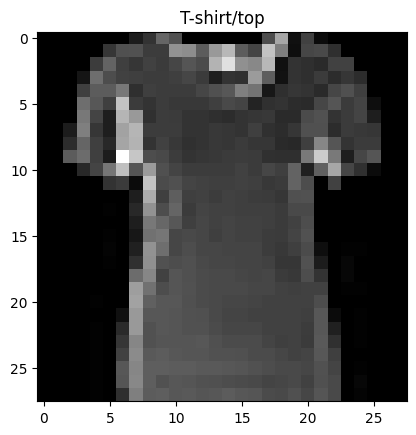

In [ ]:
predict(x_test[4000])

In [ ]:
test_5_images = x_test[0:5]

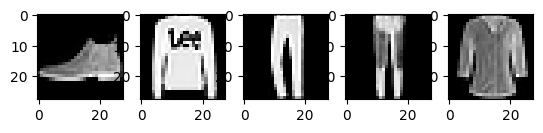

In [ ]:
for index, i in enumerate(test_5_images):
  plt.subplot(1,5,index+1)
  plt.imshow(i, cmap="gray")

In [ ]:
test_5_images = x_test[0:5]
test_5_images = test_5_images/255.0
print(test_5_images.shape)

(5, 28, 28)


In [ ]:
result = model.predict(test_5_images)
result

1/1 [==============================] - 0s 26ms/step


array([[1.0569652e-05, 3.5246271e-06, 2.8244142e-06, 7.5460639e-06,
        2.2538163e-05, 8.0181099e-02, 3.6821500e-06, 3.1793791e-01,
        2.7336383e-03, 5.9909666e-01],
       [4.0525996e-05, 2.6515456e-06, 9.2143327e-01, 6.5277268e-06,
        1.3156332e-02, 1.3151895e-07, 6.5325290e-02, 8.2765331e-12,
        3.5223027e-05, 2.5181520e-11],
       [1.1837835e-05, 9.9954599e-01, 1.1692592e-05, 2.4098718e-04,
        1.8845224e-04, 5.8290925e-07, 1.7598147e-07, 8.7263197e-11,
        1.2135943e-07, 1.3770672e-07],
       [3.9267661e-06, 9.9919194e-01, 1.5433154e-05, 6.5115426e-04,
        1.3312264e-04, 2.2176032e-06, 1.2983519e-07, 2.3905842e-09,
        2.9703418e-07, 1.7300712e-06],
       [1.0878193e-01, 1.0858267e-03, 1.2635528e-01, 1.9280499e-02,
        3.1370439e-02, 3.0630128e-04, 7.0141619e-01, 1.5189568e-07,
        1.1394863e-02, 8.4881513e-06]], dtype=float32)

In [ ]:
np.argmax(result, axis=1)

array([9, 2, 1, 1, 6])

In [ ]:
y_test[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
label_encoder[5]

'Sandal'

In [ ]:
x_test_normalized = x_test/255.0

In [ ]:
y_pred = np.argmax(model.predict(x_test_normalized), axis=1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
(y_pred == y_test).sum()

8421

In [ ]:
# Which images failed the prediction? 
wrong_index = np.where(y_pred != y_test)[0] # index of images, where prediction is not as actual (y_test)
wrong_index

array([  12,   20,   21, ..., 9979, 9985, 9989])

Actual Label: Sandal
Predicted Label: Sneaker


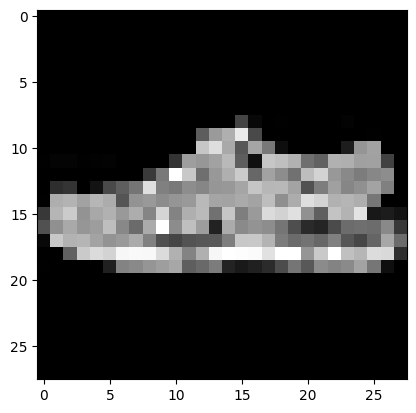

In [ ]:
def plot_wrong_images(index):
  index = index
  print(f"Actual Label: {label_encoder[y_test[index]]}")
  print(f"Predicted Label: {label_encoder[y_pred[index]]}")
  plt.imshow(x_test[index], cmap='gray')
  plt.show()
plot_wrong_images(21)

In [ ]:
import sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
label_encoder

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
cm

array([[745,   2,   9,  58,   9,   2, 156,   0,  18,   1],
       [  1, 958,   3,  26,   6,   0,   5,   0,   1,   0],
       [ 17,   5, 646,  12, 191,   1, 113,   0,  15,   0],
       [ 22,   9,   6, 870,  35,   2,  50,   0,   6,   0],
       [  0,   0,  49,  33, 819,   1,  92,   0,   6,   0],
       [  0,   0,   0,   1,   0, 920,   0,  57,   1,  21],
       [104,   1,  64,  40, 117,   0, 643,   0,  31,   0],
       [  0,   0,   0,   0,   0,  30,   0, 948,   0,  22],
       [  1,   1,   4,   9,   4,   3,  21,   7, 950,   0],
       [  0,   0,   0,   0,   0,  12,   0,  65,   1, 922]])

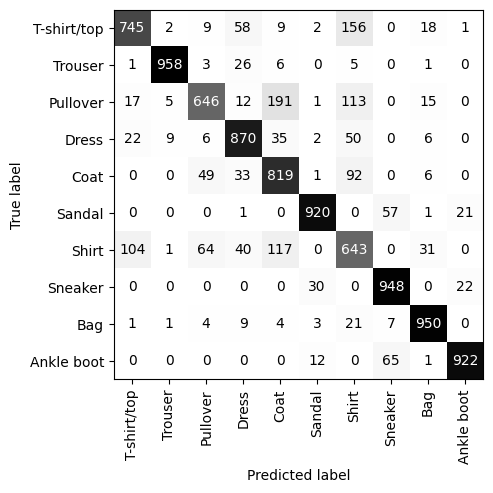

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels=list(label_encoder.values()))
disp.plot(xticks_rotation='vertical', cmap="Greys", colorbar=False)

Confusion Matrix


<Axes: >

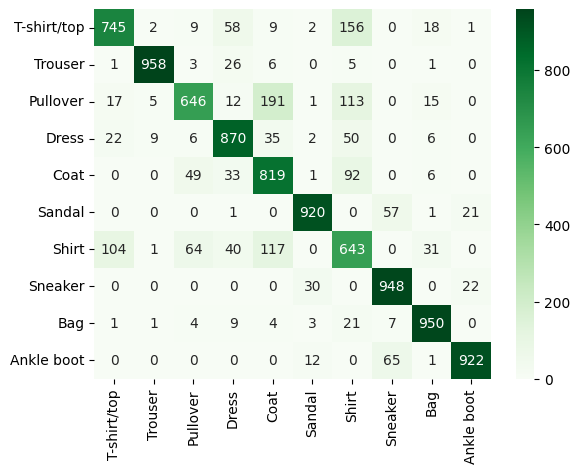

In [ ]:
print("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
sns.heatmap(np.round(confusion_matrix(y_test, y_pred),0), annot=True, cmap='Greens', fmt='.0f', 
            xticklabels=list(label_encoder.values()), 
            yticklabels=list(label_encoder.values()))